In [23]:
import numpy as np
import pandas as pd
from unicodedata import normalize
import datetime
from ekonlpy.sentiment import MPCK
mpck = MPCK()
from collections import Counter

import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from os import path

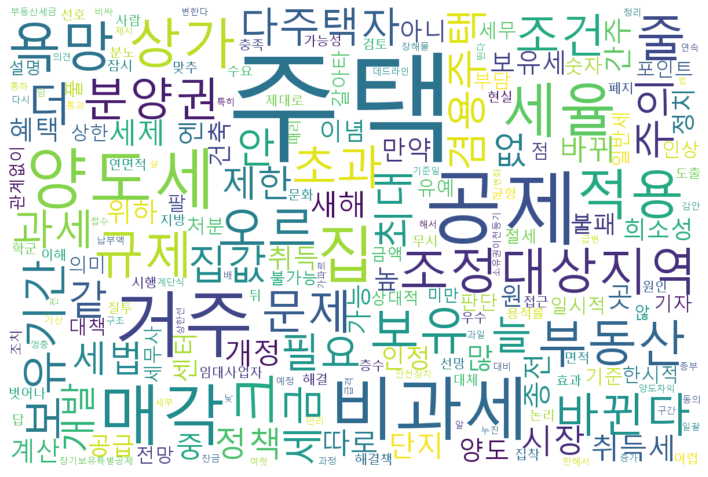

In [25]:
df = pd.read_csv('naver_news_HK.csv')

df.drop(['press','title'],axis='columns',inplace=True)
df_after = df.groupby(by=['date'],as_index=True).agg(lambda x : ','.join(x))

text = df_after['body'][0]
text = text.replace('\\n','')
text = text.replace('[', '')
text = text.replace(']', '')
text = text.replace('#', '')
text = text.replace('_', ' ')
text = text.replace("'", '')

tokens = mpck.tokenize(text)
ngrams = mpck.ngramize(tokens)
score = mpck.classify(tokens+ngrams)


# print(type(tokens))
text_list = []
for i in range(len(tokens)):
    t = tokens[i].split("/")
    text_list.append(t)
    
noun_words = []
for i in range(len(text_list)):
    noun_words.append(text_list[i][0])
#print(noun_words)
    
stopwords = ['ㄴ', '차','보다','오','았','다','이', '억', '에', '었', 
            '천', '당초', '으로','조','...','기','의','을',
            '하', '연합뉴스','.co', '에서', '뉴스', '받', '닷컴', 
             '바로가기', '한경', '구독', '신청', '경제', '무단', 
             '전재', '배포', '금지','있','되','때']
unique_Noun_words = set(noun_words)
for word in unique_Noun_words:
    if word in stopwords:
        while word in noun_words: noun_words.remove(word)
#print(noun_words)            


c = Counter(noun_words)
# print(c.most_common(20))

FONT_PATH = 'C:/Windows/Fonts/malgun.ttf'
noun_text = ''
for word in noun_words:
    noun_text = noun_text +' '+word
wordcloud = WordCloud(max_font_size=200,
                      font_path=FONT_PATH,stopwords=STOPWORDS,
                        background_color='#FFFFFF',width=1200,
                        height=800).generate(noun_text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

In [21]:
df = pd.read_csv('naver_news_HK.csv')

df.drop(['press','title'],axis='columns',inplace=True)
df_after = df.groupby(by=['date'],as_index=True).agg(lambda x : ','.join(x))

text = df_after['body'][0]
text = text.replace('\\n','')
text = text.replace('[', '')
text = text.replace(']', '')
text = text.replace('#', '')
text = text.replace('_', ' ')
text = text.replace("'", '')

tokens = mpck.tokenize(text)
ngrams = mpck.ngramize(tokens)
score = mpck.classify(tokens+ngrams)

text_list = []
for i in range(len(tokens)):
    t = tokens[i].split("/")
    text_list.append(t)

noun_words = []
for i in range(len(text_list)):
    if text_list[i][1] == 'NNG':
        noun_words.append(text_list[i][0])
        
stopwords = ['ㄴ', '차','보다','오','았','다','이', '억', '에', '었', 
            '천', '당초', '으로','조','...','기','의','을',
            '하', '연합뉴스','.co', '에서', '뉴스', '받', '닷컴', 
             '바로가기', '한경', '구독', '신청', '경제', '무단', 
             '전재', '배포', '금지','있','되','때']
unique_Noun_words = set(noun_words)
for word in unique_Noun_words:
    if word in stopwords:
        while word in noun_words: noun_words.remove(word)

c = Counter(noun_words)
print(c.most_common(20))

[('주택', 43), ('공제', 15), ('거주', 12), ('비과세', 11), ('양도세', 10), ('매각', 10), ('집', 9), ('세율', 8), ('상가', 7), ('적용', 7), ('욕망', 7), ('부동산', 6), ('보유', 6), ('조정대상지역', 6), ('규제', 6), ('조건', 5), ('분양권', 5), ('초과', 5), ('보유기간', 5), ('문제', 5)]


In [27]:
df = pd.read_csv('naver_news_HK.csv')

df.drop(['press','title'],axis='columns',inplace=True)
df_after = df.groupby(by=['date'],as_index=True).agg(lambda x : ','.join(x))

for i in range(len(df_after['body'])):
    text = df_after['body'][i]
    text = text.replace('\\n','')
    text = text.replace('[', '')
    text = text.replace(']', '')
    text = text.replace('#', '')
    text = text.replace('_', ' ')
    text = text.replace("'", '')
    
    tokens = mpck.tokenize(text)
    ngrams = mpck.ngramize(tokens)
    score = mpck.classify(tokens+ngrams)

    # print(type(tokens))
    text_list = []
    for i in range(len(tokens)):
        t = tokens[i].split("/")
        text_list.append(t)

    noun_words = []
    for i in range(len(text_list)):
        noun_words.append(text_list[i][0])
    #print(noun_words)

    stopwords = ['ㄴ', '차','보다','오','았','다','이', '억', '에', '었', 
                '천', '당초', '으로','조','...','기','의','을',
                '하', '연합뉴스','.co', '에서', '뉴스', '받', '닷컴', 
                 '바로가기', '한경', '구독', '신청', '경제', '무단', 
                 '전재', '배포', '금지','있','되','때']
    unique_Noun_words = set(noun_words)
    for word in unique_Noun_words:
        if word in stopwords:
            while word in noun_words: noun_words.remove(word)
                
print(noun_words[10])

KeyboardInterrupt: 

In [28]:
df_after

,body
date,
2020.01.01,취득세·양도세·종부세 급변…1주택도 '주의'80% 장특공제 기준 올해~내년 연속 개...
2020.01.02,공유주방 고스트키친이 1호점 삼성점과 2호점 강남역점에 이어 3호점 송파점을 열었다...
2020.01.03,종부세 인상 등 법률개정안 발의정부가 지난달 발표한 ‘12·16 부동산 대책’의 후...
2020.01.05,"가계 1573兆, 개인사업자 439兆자영업 대출 금융권 부실 '뇌관'가계와 개인사업..."
2020.01.06,우병탁 신한은행 부동산투자자문센터팀장 인터뷰최혁 한경닷컴 기자 chokob@hank...
...,...
2020.12.27,'소득 1억 이내 제한' 거론27일 서울 명동 인근 지하상가 한 가게에 세일 안내문...
2020.12.28,한국토지주택공사(LH)는 대학생과 청년 등을 상대로 기숙사형 청년주택과 청년매입임대...
2020.12.29,사진=연합뉴스정부가 착한 임대인에 대한 혜택을 확대하면서 고소득자는 배제하기로 했다...
